**Problem 5c (Chi-square independence test).** 
You are given the results of IPSOS exit polls for 2015 parliamentary elections in Poland in table **data**. Decide if we can assume that gender and voting preferences are independent. To this end:
 * Compute row totals $r_i$, column totals $c_j$, and overall total $N$.
 * If the variables are independent, we expect to see $f_{ij} = r_i c_j / N$ in $i$-th row $j$-th column.
 * Compute the test statistic as before, i.e. $$ S = \sum_{ij} \frac{\left(f_{ij}-X_{ij}\right)^2}{f_{ij}}.$$
 * Again test vs $\chi^2$ CDF. However, if the variables are independent, we only have $(r-1)(c-1)$ degrees of freedom here (we only need to know the row and column totals).
 * The KORWiN party looks like an obvious outlier. Note, when we work with categorical variables we should not just remove a category -- it is better to aggregate them. Introduce an aggregated category by summing the votes for the parties with less than 5% total votes and repeat the experiment.
 
**Note:** This kind of data is (to the best of our knowledge) not available online. It has been recreated based on
online infographics and other tidbits of information available online. It is definitely not completely accurate, hopefully it is not very far off. Moreover, exit polls do not necessary reflect the actual distribution of the population.

In [2]:
import numpy as np
import scipy.stats
# Rows: women, men
# Columns: PiS, PO, Kukiz, Nowoczesna, Lewica, PSL, Razem, KORWiN
data = np.array([[ 17508, 11642,  3308,  3131,  2911,  2205,  1852, 1235],
 [ 17672,  9318,  4865,  3259,  3029,  2479,  1606, 3259]])

ALPHA = 0.05



def f(i, j, r_i_sum, c_i_sum,  n):
    return r_i_sum[i] * c_i_sum[j] / n


def component(i, j, r_i_sum, c_i_sum,  n):
    return ((f(i, j, r_i_sum, c_i_sum,  n) - data[i][j]) ** 2) / f(i, j, r_i_sum, c_i_sum,  n)




print("Z KORWiN")
calculate(data)

data_bez_korwina = [row[:-1] for row in data]

print("BEZ KORWiN")
calculate(data_bez_korwina)

print("z tego wynika ze plec i poglady polityczne nie sa niezalezne w obu przypadkach")

Z KORWiN
mozemy odrzucic hipoteze zerowa
BEZ KORWiN
mozemy odrzucic hipoteze zerowa
z tego wynika ze plec i poglady polityczne nie sa niezalezne w obu przypadkach


Some students solving the problem above introduce various bugs, which cause them to get wrong conclusions (or right conclusions for wrong reason). Below is a simple code to test your implementation.

[0.8765740011422678, 0.4809480023586764, 0.5565557109968271, 0.8696595678641286, 0.05657987939079678, 0.1626837218400914, 0.342113269700947, 0.056375723304715186, 0.9151033813596292, 0.23282867762626924, 0.46607070076797874, 0.524763764938062, 0.6615844869231262, 0.11733729929932624, 0.6810034553291725, 0.22831319654536442, 0.694144016740556, 0.6828190642712133, 0.035889206563005094, 0.2873400390153533]


KstestResult(statistic=0.07657829402144056, pvalue=0.18180070553154337, statistic_location=0.6234217059785594, statistic_sign=1)

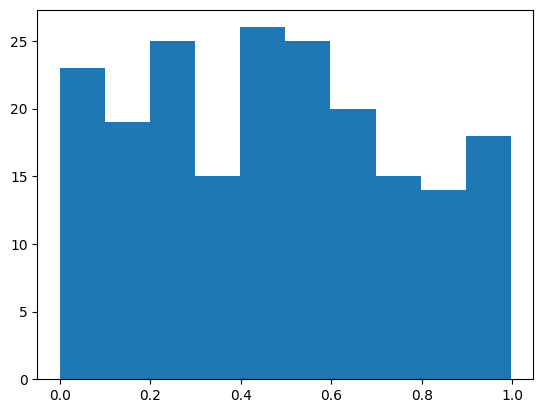

In [4]:
import matplotlib.pyplot as plt
def attempt():
    # generate a similar dataset with 6 parties and two genders
    # this time the null hypothesis is true, i.e., gender has no effect on voting preferences
    data = np.zeros([2, 6])
    for k in range(10000):
      i = np.random.randint(2)
      j = int(np.sqrt(np.random.randint(36)))
      data[i][j] = data[i][j] + 1
    # replace np.random.random() with the p-value returned by your implementation of chi-square independence test
    # return chi_square_independence_test_pvalue(data)
    return np.random.random()
    
pvalues = [attempt() for t in range(200)]
print(pvalues[:20])
# The values you get here should have (roughly) uniform distribution in [0,1].
# Note: this means that, in 20 attempts, we are likely to find one to rejecting the null hypothesis,
# even though the null hypothesis is true!
plt.hist(pvalues)

# to test whether the distribution of pvalue is indeed close to uniform distribution,
# we can use the Kolmogorov-Smirnov test:
scipy.stats.kstest(pvalues, "uniform")

# Examine the pvalue returned by kstest.
# Introduce a bug in your implementation (e.g. change the number of degrees of freedom) and see how the
# pvalue returned by kstest changes.